In [120]:
%cd /home/druhe/rail1/src/cnf
import os
os.environ['DATAROOT'] = '/home/druhe/datasets'



/home/druhe/rail1/src/cnf


/home/druhe/rail1/src/cnf/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [121]:
import matplotlib.pyplot as plt

In [122]:
import torch
import scipy.ndimage

locs = torch.rand(2, 2) * 2 - 1

In [123]:
linspace = torch.linspace(-1, 1, 10)
grid = torch.stack(torch.meshgrid(linspace, linspace, indexing='xy'), dim=-1).reshape(-1, 2)


In [124]:
locs.shape, grid.shape

(torch.Size([2, 2]), torch.Size([100, 2]))

In [125]:
d = (locs[:, None, :] - grid[None, :, :])

In [126]:
V_e = - 1 / (d[..., 0]**2 + d[..., 1]**2 + 1e-2)

In [127]:
V_e_sum = V_e.sum(dim=0)

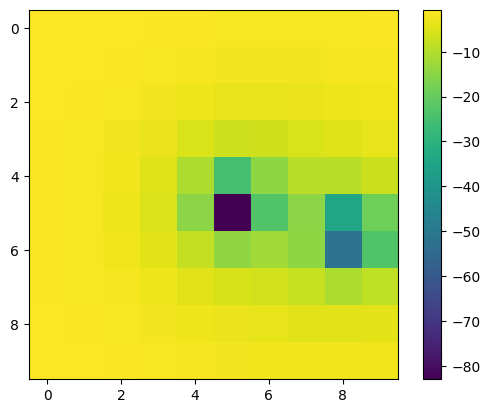

In [128]:
plt.imshow(V_e_sum.reshape(10, 10))
plt.colorbar()

In [133]:
linspace = torch.linspace(-1, 1, 500)
X, Y = torch.meshgrid(linspace, linspace, indexing='xy')
EPS = 1e-1

O = torch.rand(8, 2) * 2 - 1

Z = ((X[..., None] - O[..., 0]) ** 2 + (Y[..., None] - O[..., 1]) ** 2 + EPS ** 2) ** (3/2)

F_x = -torch.sum((X[..., None] - O[..., 0]) / Z, dim=-1)
F_y = -torch.sum((Y[..., None] - O[..., 1]) / Z, dim=-1)

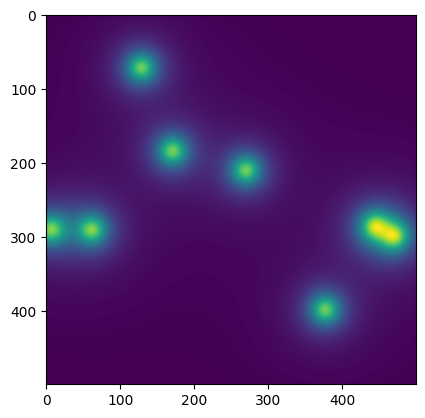

In [134]:
V = torch.sum(1 / Z, dim=-1)
plt.imshow(V)

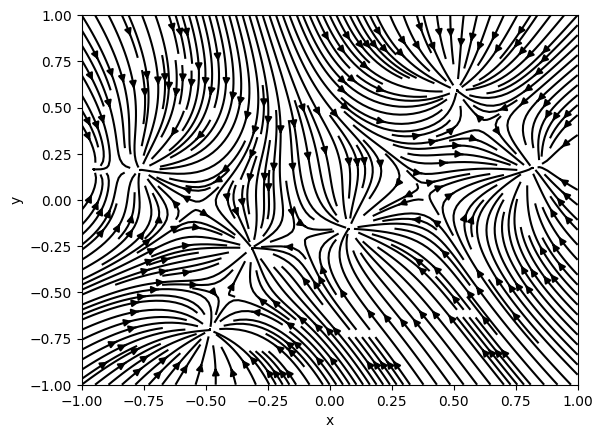

In [135]:
plt.figure()
plt.streamplot(X.numpy(), Y.numpy(), F_x.numpy(), F_y.numpy(), color='k', density=2.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


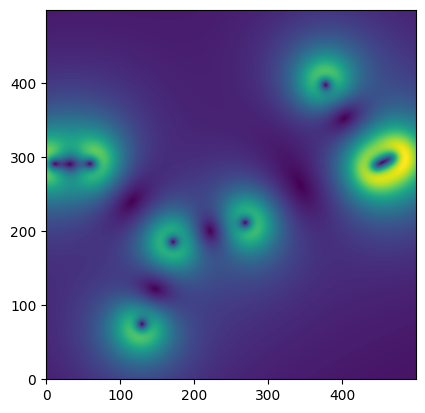

In [136]:
plt.imshow(torch.sqrt(F_x**2 + F_y**2), origin='lower')

In [137]:
O[:, None] - O[:, :, None]
Z_O = ((O[:, None, 0] - O[None, :, 0]) ** 2 + (O[:, None, 1] - O[None, :, 1]) ** 2 + EPS ** 2) ** (3/2)

F_x_O = -torch.sum((O[:, None, 0] - O[None, :, 0]) / Z_O, dim=-1)
F_y_O = -torch.sum((O[:, None, 1] - O[None, :, 1]) / Z_O, dim=-1)

F_O = torch.stack([F_x_O, F_y_O], dim=-1)

In [138]:
F_O

tensor([[  2.5841,   7.5737],
        [ 22.9600,  15.8108],
        [-32.9052, -12.6398],
        [ 18.8935,  -1.7330],
        [ -4.9105,   0.5292],
        [  2.3663,   1.2295],
        [-10.6514,  -3.2756],
        [  1.6631,  -7.4948]])

In [139]:
F_O_mag = F_O.norm(dim=-1)

V_O = torch.sum(1 / Z_O, dim=-1)

In [140]:
F_mag = torch.sqrt(F_x**2 + F_y**2)

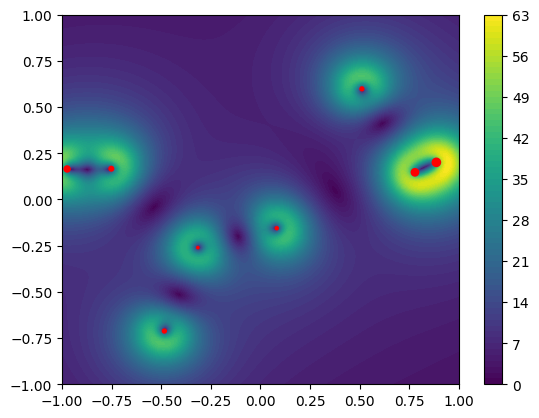

In [141]:
plt.contourf(X, Y, F_mag, levels=64)
plt.colorbar()

plt.scatter(O[:, 0], O[:, 1], c='r', s=F_O_mag)

In [142]:
import numpy as np
from scipy.interpolate import griddata


points = np.vstack((X.ravel(), Y.ravel())).T
values = F_mag.ravel()

# Interpolate F at the additional points
# additional_points = np.vstack((additional_x, additional_y)).T
F_interpolated = griddata(points, values, O, method='cubic')
F_interpolated

array([ 7.9956934 , 27.88144616, 35.264024  , 18.98294115,  4.92450017,
        2.43133283, 11.13271059,  7.67557255])

In [143]:
F_O_mag

tensor([ 8.0024, 27.8773, 35.2493, 18.9728,  4.9389,  2.6666, 11.1437,  7.6771])

F_mag

# TODO: Forces for the particles.
# TODO: Create dataset.

# START WITH LEARNING THE POTENTIAL